# K-nearist neighbors for heights ans weights

---


A supervised learning algorithm

In [1]:
# Libraries from env
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Reading data and transforming it into a data frame
height_and_weight_data = pd.read_csv("Height-and-Weight-Data.csv")

In [3]:
# casting all the data we want
height_and_weight_data["height"] = height_and_weight_data["height"].astype(int)
height_and_weight_data["weight"] = height_and_weight_data["weight"].astype(int)

In [4]:
train_data = height_and_weight_data[:40]
train_data.head()


,sex,height,weight
0,male,174,67
1,male,179,73
2,female,159,49
3,female,164,54
4,male,178,74


In [5]:
test_data = height_and_weight_data[40:]
test_data.head()

,sex,height,weight
40,female,166,56
41,female,163,53
42,female,169,59
43,male,176,71
44,female,161,51


In [6]:
# # Plotting all the Data
# plt.bar(height_and_weight_data["height"], height_and_weight_data["weight"])
# plt.xlabel("Height")
# plt.ylabel("Weight")
# plt.show()

In [7]:
men_height_weight = height_and_weight_data[height_and_weight_data["sex"]== "male"]
men_height_weight.head()

,sex,height,weight
0,male,174,67
1,male,179,73
4,male,178,74
5,male,182,80
7,male,179,77


In [8]:
female_height_weight = height_and_weight_data[height_and_weight_data["sex"]== "male"]
female_height_weight.head()

,sex,height,weight
0,male,174,67
1,male,179,73
4,male,178,74
5,male,182,80
7,male,179,77


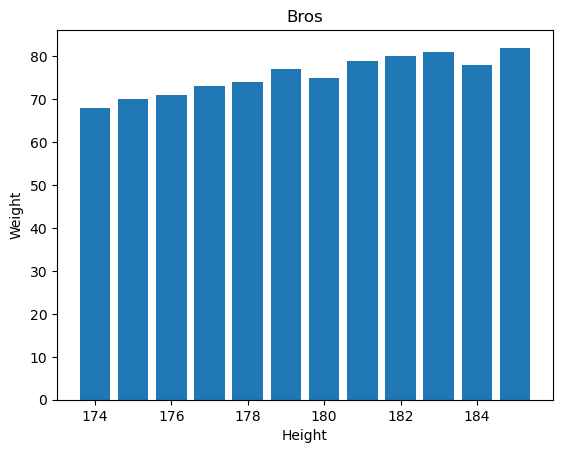

In [9]:
plt.bar(men_height_weight["height"], men_height_weight["weight"])
plt.title("Bros")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

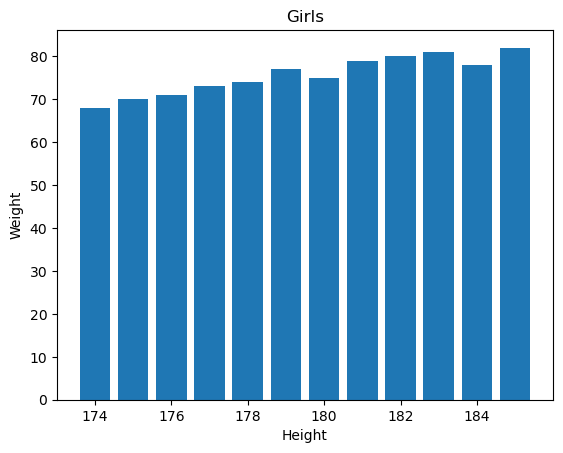

In [10]:
plt.bar(female_height_weight["height"], female_height_weight["weight"])
plt.title("Girls")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

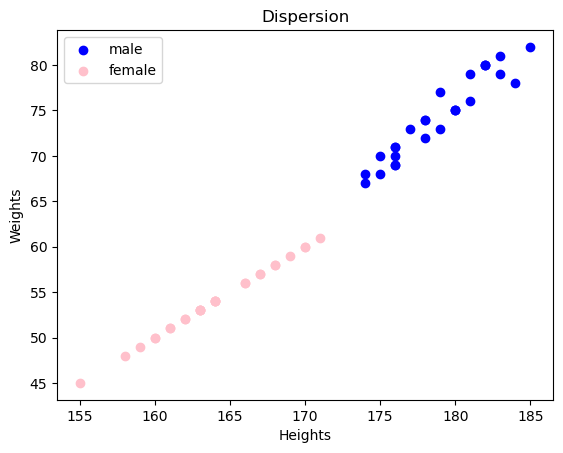

In [11]:
# Dispersion Graph
ax = plt.axes()
ax.scatter(height_and_weight_data.loc[height_and_weight_data['sex'] == 'male', 'height'],
           height_and_weight_data.loc[height_and_weight_data['sex'] == 'male', 'weight'],
           c="blue",
           label="male")
ax.scatter(height_and_weight_data.loc[height_and_weight_data['sex'] == 'female', 'height'],
           height_and_weight_data.loc[height_and_weight_data['sex'] == 'female', 'weight'],
           c="pink",
           label="female")

plt.title("Dispersion")
plt.xlabel("Heights")
plt.ylabel("Weights")
ax.legend()
plt.show()

# Lets start making our AI Algorithm


In [12]:
# Let's start the AI part
labels = train_data["sex"]
train_data = train_data[['height', 'weight']]

# K neighbors
k = int(np.sqrt( train_data.shape[0]));

if k%2==0: # k can'
   k=k+1
   
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(train_data, labels)


KNeighborsClassifier(n_neighbors=7)

In [13]:
comprobal = test_data
comprobal

,sex,height,weight
40,female,166,56
41,female,163,53
42,female,169,59
43,male,176,71
44,female,161,51
45,male,183,81
46,male,181,79
47,male,175,70
48,female,168,58
49,male,182,80


In [14]:
#  Time for testing
# We want to gess the label "sex" so
# eliminating the label
test_data = test_data[['height','weight']]



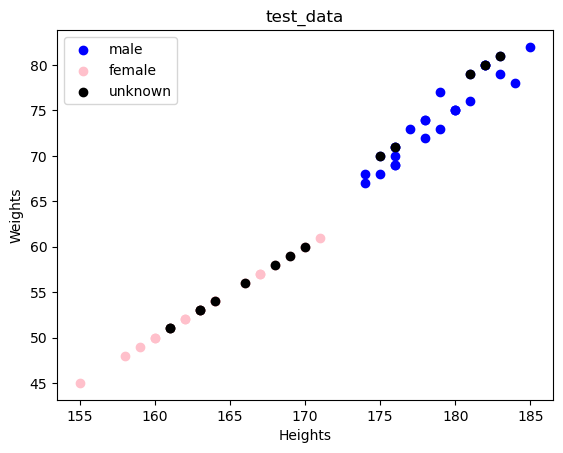

In [15]:
ax = plt.axes()
ax.scatter(height_and_weight_data.loc[height_and_weight_data['sex'] == 'male', 'height'],
           height_and_weight_data.loc[height_and_weight_data['sex'] == 'male', 'weight'],
           c="blue",
           label="male")
ax.scatter(height_and_weight_data.loc[height_and_weight_data['sex'] == 'female', 'height'],
           height_and_weight_data.loc[height_and_weight_data['sex'] == 'female', 'weight'],
           c="pink",
           label="female")

ax.scatter(test_data['height'],
           test_data['weight'],
           c="black",
          label = "unknown")

plt.title("test_data")
plt.xlabel("Heights")
plt.ylabel("Weights")
ax.legend()
plt.show()



In [16]:
prediction = knn.predict(test_data)


C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
prediction

array(['female', 'female', 'female', 'male', 'female', 'male', 'male',
       'male', 'female', 'male', 'female', 'female', 'female', 'female'],
      dtype=object)

In [22]:
# So our result is
test_data['sex'] = prediction
# changing the row of the category
test_data = test_data[['sex','height','weight']]
test_data


,sex,height,weight
40,female,166,56
41,female,163,53
42,female,169,59
43,male,176,71
44,female,161,51
45,male,183,81
46,male,181,79
47,male,175,70
48,female,168,58
49,male,182,80


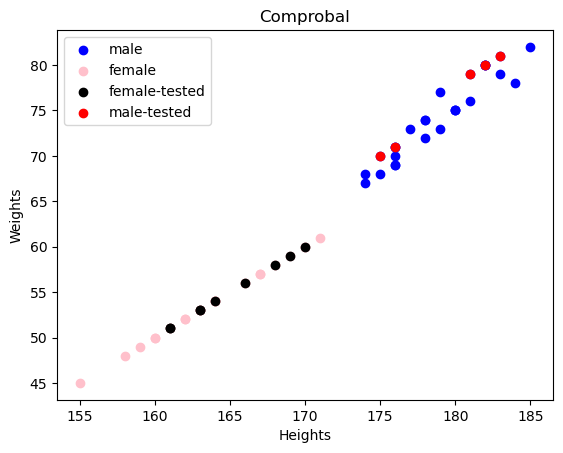

In [23]:
ax = plt.axes()
ax.scatter(height_and_weight_data.loc[height_and_weight_data['sex'] == 'male', 'height'],
           height_and_weight_data.loc[height_and_weight_data['sex'] == 'male', 'weight'],
           c="blue",
           label="male")
ax.scatter(height_and_weight_data.loc[height_and_weight_data['sex'] == 'female', 'height'],
           height_and_weight_data.loc[height_and_weight_data['sex'] == 'female', 'weight'],
           c="pink",
           label="female")

ax.scatter(test_data.loc[test_data['sex'] == 'female', 'height'],
           test_data.loc[test_data['sex'] == 'female', 'weight'],
           c="black",
           label="female-tested")

ax.scatter(test_data.loc[test_data['sex'] == 'male', 'height'],
           test_data.loc[test_data['sex'] == 'male', 'weight'],
           c="red",
           label="male-tested")

plt.title("Comprobal")
plt.xlabel("Heights")
plt.ylabel("Weights")
ax.legend()
plt.show()